In [68]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import Bounds
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [69]:
def set_ticks(ax, xMaj, xMin, yMaj, yMin):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.xaxis.set_minor_locator(AutoMinorLocator(xMin))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.yaxis.set_minor_locator(AutoMinorLocator(yMin))
    ax.tick_params(which='major', width=1.0, length=10, direction="in", labelsize=12)
    ax.tick_params(which='minor', width=1.0, length=5, direction="in", labelsize=12)

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [70]:
val = 15
avg = 6.3

# using a Poisson pdf
pval = sp.stats.poisson.sf(val, avg)
z    = sp.stats.norm.ppf(1-pval)

print("The Z score is", z)

# using a Gaussian pdf
sigma = np.sqrt(avg)
z_norm = abs(val - avg) / sigma

print("The Z score assuming a normal pdf is", z_norm)
if(z > 3):
    print("Yes, the 2005 value is statistically significant.")
else:
    print("No, the 2005 value is not statistically significant.")

The Z score is 3.1400853556957866
The Z score assuming a normal pdf is 3.4661629670697414
Yes, the 2005 value is statistically significant.


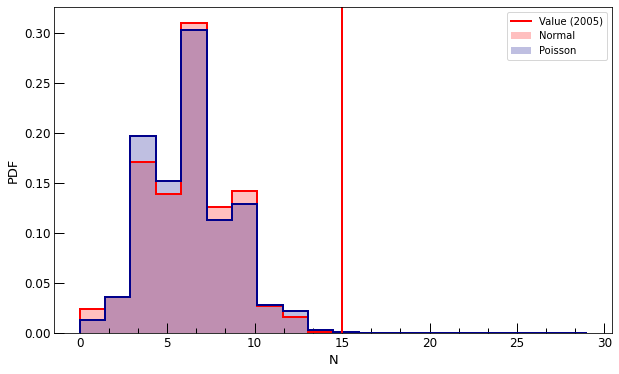

In [71]:
# plot layout
fig, ax = plt.subplots(figsize=(10, 6))
set_ticks(ax, 5, 3, 0.05, 1)

# data
x = np.arange(0, 30, 1)
y_pois = sp.stats.poisson.pmf(k=x, mu=avg)
y_norm = sp.stats.norm.pdf(x, loc=avg, scale=sigma)

# plot
_ = ax.hist(x=x, weights=y_norm, bins=20, histtype="stepfilled", label="Normal", facecolor="red", alpha=0.25)
_ = ax.hist(x=x, weights=y_norm, bins=20, histtype="step", edgecolor="red", linewidth=2)

_ = ax.hist(x=x, weights=y_pois, bins=20, histtype="stepfilled", label="Poisson", facecolor="darkblue", alpha=0.25)
_ = ax.hist(x=x, weights=y_pois, bins=20, histtype="step", edgecolor="darkblue", linewidth=2)

ax.axvline(val, color="red", lw=2, label="Value (2005)")

# labels
ax.set_xlabel("N", fontsize=13)
ax.set_ylabel("PDF", fontsize=13)
_ = ax.legend(loc='upper right', markerscale=1)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [72]:
pre  = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# compute mean and stdev
mean_pre = np.mean(pre)
mean_post = np.mean(post)
s_pre = np.std(pre, ddof=1)
s_post = np.std(post, ddof=1)

# compute sigma and test
n = len(pre)
dof = n - 1

sigma = np.sqrt((s_pre**2 + s_post**2) / 2)
T = np.abs(mean_pre - mean_post) / (sigma * np.sqrt(2/n)) 
print("T = %.4f" % T)

# p-value of double tailed Student pdf
pval = sp.stats.t.cdf(-T, loc=0, scale=1, df=dof)  + sp.stats.t.sf(T, loc=0, scale=1, df=dof) 
print("The p-value is %.4f" % pval)

threshold = 0.025
if(pval < threshold):
    print("The p-value is less than the 2.5% threshold, hence we reject the null hypotesis.")
    print("The change is statistically significant.")
else:
    print("The change is *not* statistically significant.")

T = 3.7870
The p-value is 0.0043
The p-value is less than the 2.5% threshold, hence we reject the null hypotesis.
The change is statistically significant.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [ ]:
#load the data and plot it
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.